In [7]:
import numpy as np
from PIL import Image, ImageFilter
from torchvision.transforms import RandomCrop

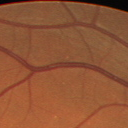

In [305]:
img_path = '../../data/raw/DRIVE/training/images/36_training.tif'
cr = RandomCrop(128)
img = Image.open(img_path)
img = cr(img)
img

5.114317536019371


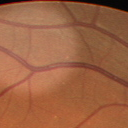

In [328]:
from scipy.ndimage.filters import gaussian_filter
import time
import random

class SpecularAugment(object):
    def __init__(self, crop_size):
        self.crop_size = crop_size
     
    def __call__(self, img):
        # Apply transformation in 25% of cases
        if random.random() > 0.25 and False:
            return img
       
        img = np.array(img, dtype=np.uint32)
        mask = np.zeros_like(img)        
        
        pos_x = np.random.randint(low=0, high=self.crop_size)
        pos_y = np.random.randint(low=0, high=self.crop_size)
        radius = np.random.uniform(30, 50)
        intensity = np.random.uniform(30, 50)

        # Select points that s.t. they are still in image
        xx, yy = np.mgrid[:img.shape[0], :img.shape[1]]
        circle = ((xx - pos_x)**2 + (yy - pos_y)**2) < radius**2

        # Create (blurred) mask
        mask[circle] = intensity
        mask = gaussian_filter(mask, sigma=5)

        # Add mask only to pixels that are not black
        black = img.sum(axis=-1) < 90
        img[~black] = (img[~black] + mask[~black]).clip(0,255)
        
        return Image.fromarray(img.astype(np.uint8))
    
augm = SpecularAugment(crop_size=128)
start = time.perf_counter()
for _ in range(10):
    s = augm(img)
    # 35 ..70 strength
    # 30 .. 50
end = time.perf_counter()
print((end - start)*96)
s